In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay #model evaluation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Trump and Hilary
TrumpHilary = pd.read_csv('tweets.csv')
TrumpHilary = TrumpHilary.drop(['id', 'handle', 'is_retweet', 'original_author', 'time',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count', 'longitude', 'latitude', 'place_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box', 'source_url', 'truncated', 'entities',
       'extended_entities'], axis=1)

#Joe Biden
JoeBiden = pd.read_csv('JoeBidenTweets.csv')
JoeBiden = JoeBiden.drop(['id', 'timestamp', 'url', 'replies', 'retweets', 'quotes', 'likes'], axis=1)
JoeBiden.columns = ['text' if col == 'tweet' else col for col in JoeBiden.columns]

#Obama
Obama = pd.read_csv('obama.csv')
Obama = Obama.drop(['UserScreenName', 'UserName', 'Timestamp', 'Text', 'Emojis', 'Comments', 'Likes', 'Retweets', 'Image link', 'Tweet URL'], axis=1)
Obama.columns = ['text' if col == 'Embedded_text' else col for col in Obama.columns]

#Musk
Musk = pd.read_csv('elonmusk.csv')
Musk = Musk.drop(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'], axis=1)
Musk.columns = ['text' if col == 'tweet' else col for col in Musk.columns]

#Oprah
Oprah = pd.read_csv('Oprah.csv')
Oprah = Oprah.drop(['created_at', 'date', 'likeCount', 'media', 'outlinks',
       'quoteCount', 'quotedTweet', 'replyCount', 'retweetCount',
       'retweetedTweet', 'url', 'id', 'conversationId'], axis = 1)
Oprah.columns = ['text' if col == 'content' else col for col in Oprah.columns]


In [ ]:
def text_display(data):
  print(data['text'].iloc[0],"\n")
  print(data['text'].iloc[0],"\n")
  print(data['text'].iloc[2],"\n")
  print(data['text'].iloc[3],"\n")
  print(data['text'].iloc[4],"\n")


The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG 

The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG 

Couldn't be more proud of @HillaryClinton. Her vision and command during last night's debate showed that she's ready to be our next @POTUS. 

If we stand together, there's nothing we can't do. 

Make sure you're ready to vote: https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy 

Both candidates were asked about how they'd confront racial injustice. Only one had a real answer. https://t.co/sjnEokckis 

Tune in 11:30 ET tomorrow for a live webcast of Families USA Presidential Forum on health care: http://presidentialforums.health08.org/ 

Tune in 11:30 ET tomorrow for a live webcast of Families USA Presidential Forum on health care: http://presidentialforums.health08.org/ 

We're excited to announce that @JoeBiden is being rebooted for the 2012 ca

In [ ]:
import nltk
nltk.download('punkt')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def data_processing(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('english'))

    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if w.lower() not in stop_words]
    return " ".join(filtered_text)

TrumpHilary.text = TrumpHilary['text'].apply(data_processing)
JoeBiden.text = JoeBiden['text'].apply(data_processing)
Obama.text = Obama['text'].apply(data_processing)
Musk.text = Musk['text'].apply(data_processing)
Oprah.text = Oprah['text'].apply(data_processing)


stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

Trump_Hilary = TrumpHilary.drop_duplicates('text')
Trump_Hilary['text'] = Trump_Hilary['text'].apply(lambda x: stemming(x))
JoeBiden = JoeBiden.drop_duplicates('text')
JoeBiden['text'] = JoeBiden['text'].apply(lambda x: stemming(x))
Obama = Obama.drop_duplicates('text')
Obama['text'] = Obama['text'].apply(lambda x: stemming(x))
Musk = Musk.drop_duplicates('text')
Musk['text'] = Musk['text'].apply(lambda x: stemming(x))
Oprah = Oprah.drop_duplicates('text')
Oprah['text'] = Oprah['text'].apply(lambda x: stemming(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-6-d208518925c8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trump_Hilary['text'] = Trump_Hilary['text'].apply(lambda x: stemming(x))


In [ ]:
#dodatkowy processing ze względu na format danych
def process_text(text):
    text_without_numbers_at_end = re.sub(r'\d+$', '', text, flags=re.MULTILINE)
    text_without_empty_lines = re.sub(r'\n\s*\n\s*\n', '\n\n', text_without_numbers_at_end, flags=re.MULTILINE)
    return text_without_empty_lines.strip()

Obama['text'] = Obama['text'].apply(process_text)
Obama['text'] = Obama['text'].apply(process_text)
Obama['text'] = Obama['text'].apply(process_text)

detroit economic club talking need reduce dependence foreign oil 

detroit economic club talking need reduce dependence foreign oil 

indianola iowa heading des moines 

thinking presidents word last word iraq 

trenton nj aflcio town hall meeting 



In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

def apply_polarity(data):
  data['polarity'] = data['text'].apply(polarity)

apply_polarity(TrumpHilary)
apply_polarity(JoeBiden)
apply_polarity(Obama)
apply_polarity(Musk)
apply_polarity(Oprah)

def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "Positive"

def apply_sentiment(data):
  data['sentiment'] = data['polarity'].apply(sentiment)

apply_sentiment(TrumpHilary)
apply_sentiment(JoeBiden)
apply_sentiment(Obama)
apply_sentiment(Musk)
apply_sentiment(Oprah)

Oprah.head(5)

,text,polarity,sentiment
0,ava sure made us wait long enough nova queensugar,0.150000,Positive
1,sure made us waitling enough,0.250000,Positive
2,great bringing glynn thurman back sweet queens...,0.383333,Positive
3,90 min episode tonight yall,0.000000,Neutral
4,regard darla think ralph angel pretty understa...,0.250000,Positive


<ipython-input-10-964048023ae2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=file, ax=axes[n], order=file['sentiment'].value_counts().index, palette=colors)
<ipython-input-10-964048023ae2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=file, ax=axes[n], order=file['sentiment'].value_counts().index, palette=colors)
<ipython-input-10-964048023ae2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=file, ax=axes[n], order=file['sentiment'].value_counts().index, palette=colors

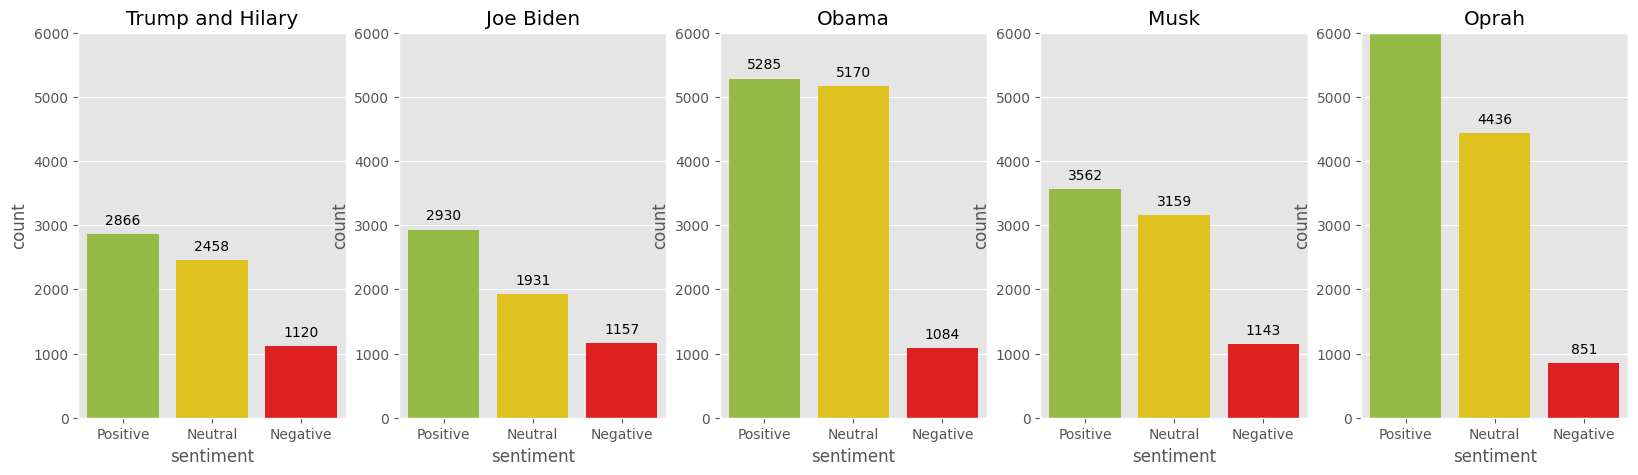

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

def bar_chart(file, text, n):
    colors = {'Positive':'yellowgreen', 'Neutral':"gold", 'Negative':"red"}
    sns.countplot(x='sentiment', data=file, ax=axes[n], order=file['sentiment'].value_counts().index, palette=colors)
    for p in axes[n].patches:
        axes[n].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    axes[n].set_title(text)

bar_chart(TrumpHilary, 'Trump and Hilary', 0)
bar_chart(JoeBiden, 'Joe Biden', 1)
bar_chart(Obama, 'Obama', 2)
bar_chart(Musk, 'Musk', 3)
bar_chart(Oprah, 'Oprah', 4)

for ax in axes:
    ax.set_ylim(0, 6500)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def pie_chart(data, text, subplot_number):
    colors = ("yellowgreen", "gold", "red")
    tags = data['sentiment'].value_counts()
    plt.subplot(1, 5, subplot_number)
    tags.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90, label='')
    plt.title(text)

plt.figure(figsize=(15, 10))
pie_chart(TrumpHilary, 'Trump and Hilary', 1)
pie_chart(JoeBiden, 'Joe Biden', 2)
pie_chart(Obama, 'Obama', 3)
pie_chart(Musk, 'Musk', 4)
pie_chart(Oprah, 'Oprah', 5)


plt.tight_layout()
plt.show()


NameError: name 'TrumpHilary' is not defined

<Figure size 1500x1000 with 0 Axes>

In [ ]:
pos_tweetsTH = TrumpHilary[TrumpHilary.sentiment == 'Positive']
pos_tweetsTH = pos_tweetsTH.sort_values(['polarity'], ascending= False)
neg_tweetsTH = TrumpHilary[TrumpHilary.sentiment == 'Negative']
neg_tweetsTH = neg_tweetsTH.sort_values(['polarity'], ascending= False)
neutral_tweetsTH = TrumpHilary[TrumpHilary.sentiment == 'Neutral']
neutral_tweetsTH = neutral_tweetsTH.sort_values(['polarity'], ascending= False)


pos_tweetsJB = JoeBiden[JoeBiden.sentiment == 'Positive']
pos_tweetsJB = pos_tweetsJB.sort_values(['polarity'], ascending= False)
neg_tweetsJB = JoeBiden[JoeBiden.sentiment == 'Negative']
neg_tweetsJB = neg_tweetsJB.sort_values(['polarity'], ascending= False)
neutral_tweetsJB = JoeBiden[JoeBiden.sentiment == 'Neutral']
neutral_tweetsJB = neutral_tweetsJB.sort_values(['polarity'], ascending= False)


pos_tweetsO = Obama[Obama.sentiment == 'Positive']
pos_tweetsO = pos_tweetsO.sort_values(['polarity'], ascending= False)
neg_tweetsO = Obama[Obama.sentiment == 'Negative']
neg_tweetsO = neg_tweetsO.sort_values(['polarity'], ascending= False)
neutral_tweetsO = Obama[Obama.sentiment == 'Neutral']
neutral_tweetsO = neutral_tweetsO.sort_values(['polarity'], ascending= False)


pos_tweetsM = Musk[Musk.sentiment == 'Positive']
pos_tweetsM = pos_tweetsM.sort_values(['polarity'], ascending= False)
neg_tweetsM = Musk[Musk.sentiment == 'Negative']
neg_tweetsM = neg_tweetsM.sort_values(['polarity'], ascending= False)
neutral_tweetsM = Musk[Musk.sentiment == 'Neutral']
neutral_tweetsM = neutral_tweetsM.sort_values(['polarity'], ascending= False)


pos_tweetsOP = Oprah[Oprah.sentiment == 'Positive']
pos_tweetsOP = pos_tweetsOP.sort_values(['polarity'], ascending= False)
neg_tweetsOP = Oprah[Oprah.sentiment == 'Negative']
neg_tweetsOP = neg_tweetsOP.sort_values(['polarity'], ascending= False)
neutral_tweetsOP = Oprah[Oprah.sentiment == 'Neutral']
neutral_tweetsOP = neutral_tweetsOP.sort_values(['polarity'], ascending= False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def word_count(data, title, x):
    word_freq = {}
    total_words = 0

    for text in data['text']:
        words = text.split()
        total_words += len(words)
        for word in words:
            word = word.lower()
            if word != 'trump' and word != 'hillary' and word != 'donald' and word != 'clinton' and word != 'trumps' and word != 'biden' and word != 'obama':
                if word.isalpha():
                    if word in word_freq:
                        word_freq[word] += 1
                    else:
                        word_freq[word] = 1

    df_word_freq = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
    df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
    df_word_freq.index += 1

    df_word_freq['Total Words'] = total_words

    plt.figure(figsize=(8, 3))
    plt.bar(df_word_freq['Word'][:10], df_word_freq['Frequency'][:10], color='red')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, x)
    plt.tight_layout()
    plt.show()

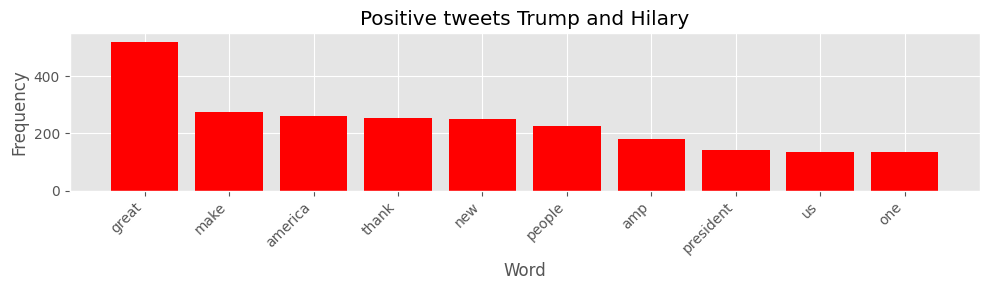

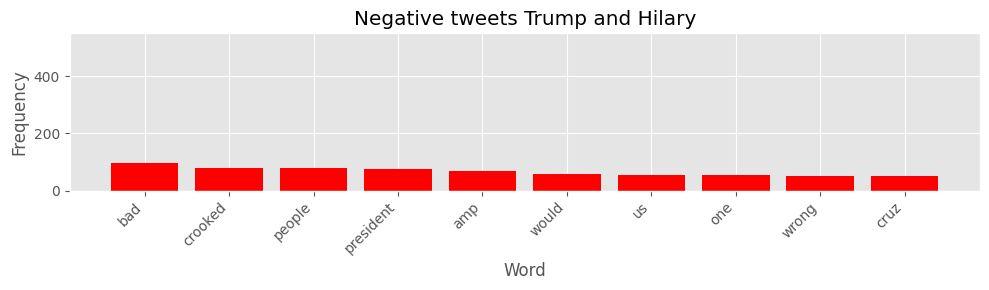

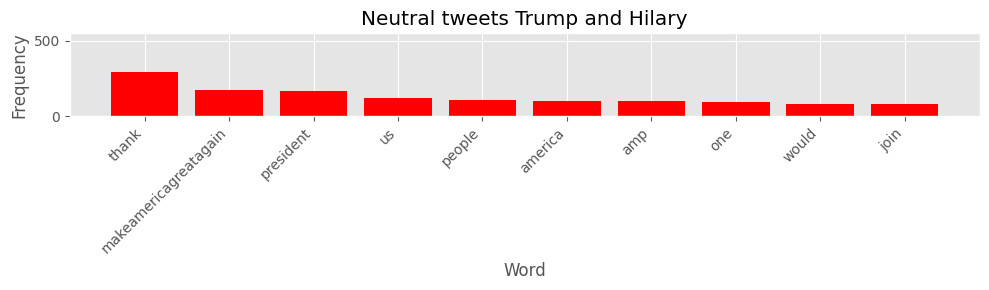

In [ ]:
word_count(pos_tweetsTH, 'Positive tweets Trump and Hilary', 550)
word_count(neg_tweetsTH, 'Negative tweets Trump and Hilary', 550)
word_count(neutral_tweetsTH, 'Neutral tweets Trump and Hilary', 550)

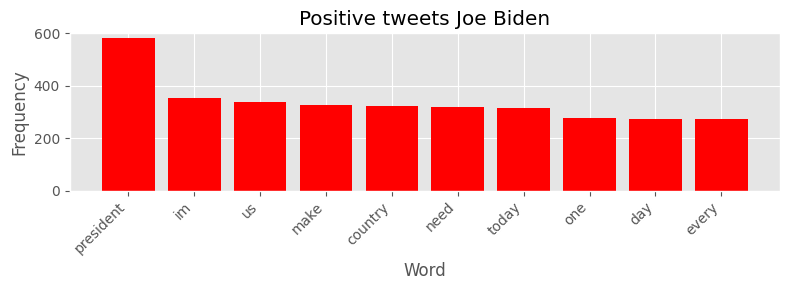

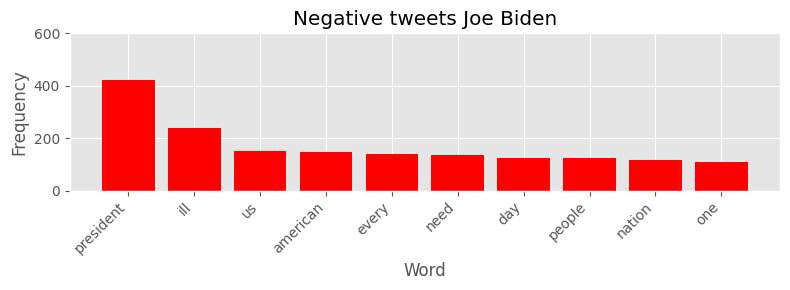

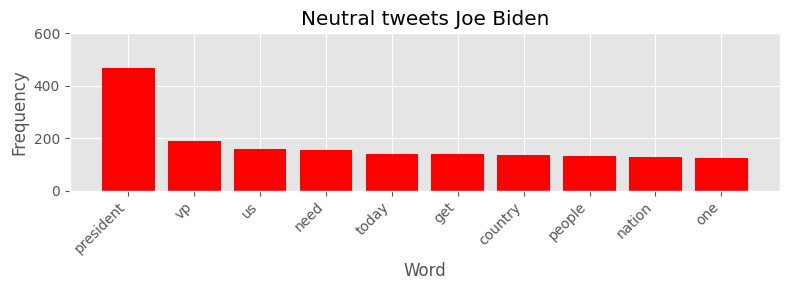

In [ ]:
word_count(pos_tweetsJB, 'Positive tweets Joe Biden', 600)
word_count(neg_tweetsJB, 'Negative tweets Joe Biden', 600)
word_count(neutral_tweetsJB, 'Neutral tweets Joe Biden', 600)

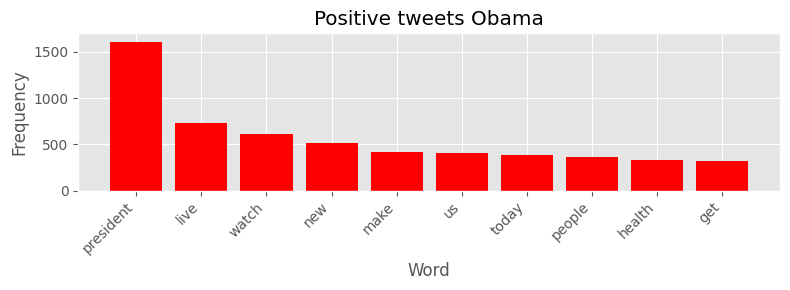

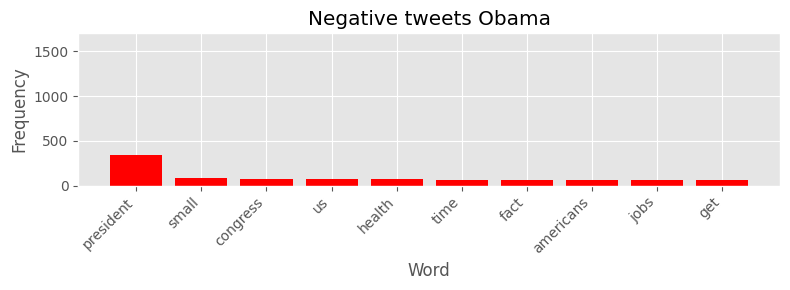

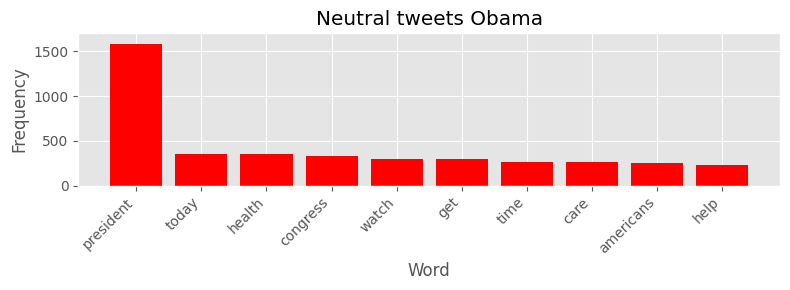

In [ ]:
word_count(pos_tweetsO, 'Positive tweets Obama', 1700)
word_count(neg_tweetsO, 'Negative tweets Obama', 1700)
word_count(neutral_tweetsO, 'Neutral tweets Obama', 1700)

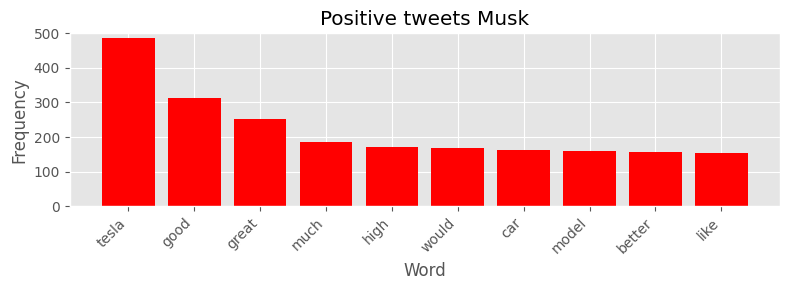

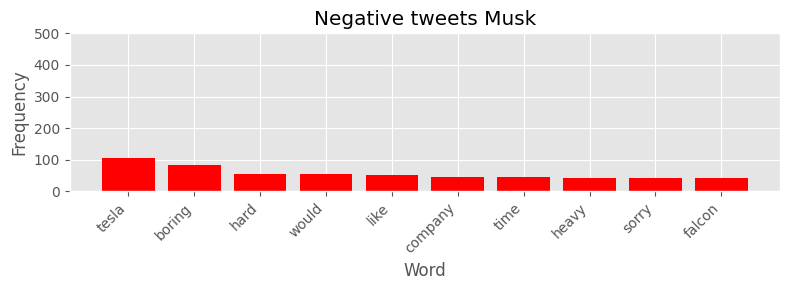

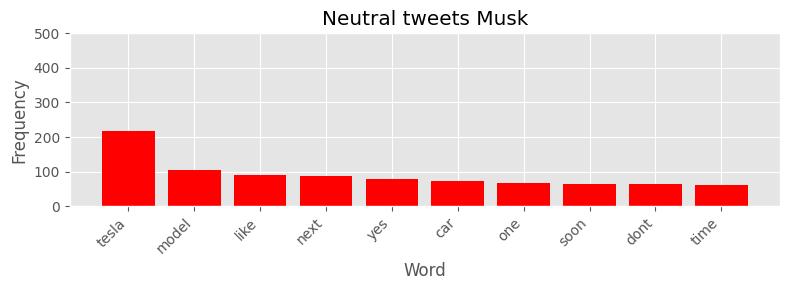

In [ ]:
word_count(pos_tweetsM, 'Positive tweets Musk', 500)
word_count(neg_tweetsM, 'Negative tweets Musk', 500)
word_count(neutral_tweetsM, 'Neutral tweets Musk', 500)

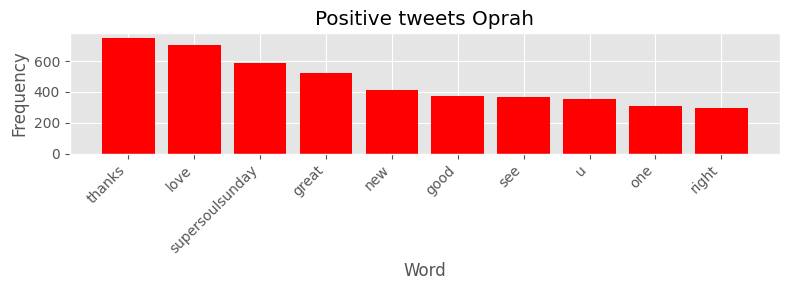

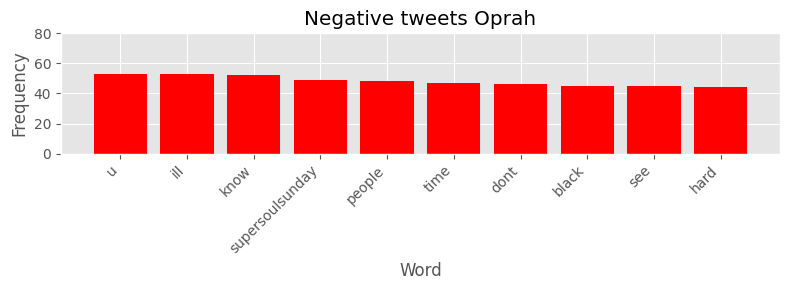

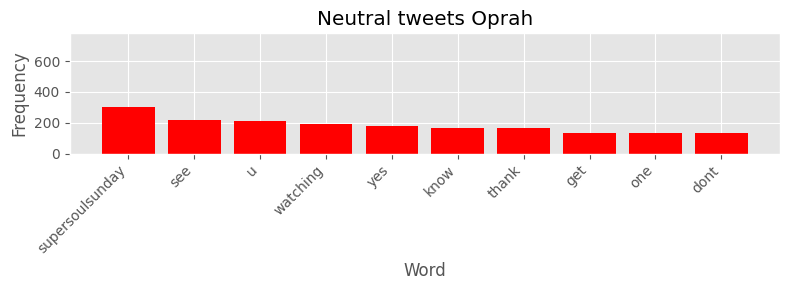

In [ ]:
word_count(pos_tweetsOP, 'Positive tweets Oprah', 780)
word_count(neg_tweetsOP, 'Negative tweets Oprah', 80)
word_count(neutral_tweetsOP, 'Neutral tweets Oprah', 780)

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(Oprah['text'])

In [ ]:
X = Oprah['text']
Y = Oprah['sentiment']
X = vect.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.67%


[[162  56  42]
 [  8 561  14]
 [ 14  62 614]]


              precision    recall  f1-score   support

    Negative       0.88      0.62      0.73       260
     Neutral       0.83      0.96      0.89       583
    Positive       0.92      0.89      0.90       690

    accuracy                           0.87      1533
   macro avg       0.87      0.83      0.84      1533
weighted avg       0.88      0.87      0.87      1533



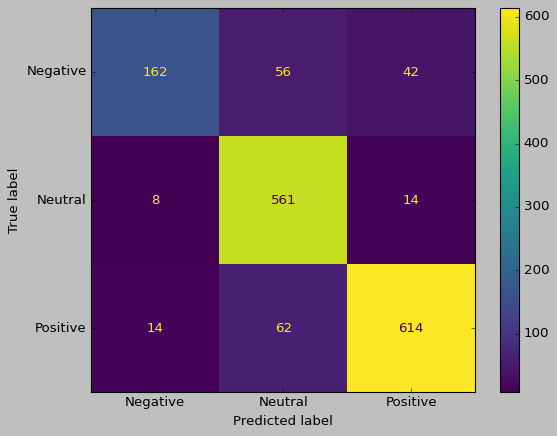

In [ ]:
# print(confusion_matrix(y_test, logreg_pred))
# print("\n")
print(classification_report(y_test, logreg_pred))
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()